In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [ ]:
df= pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df= pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:


from sklearn.model_selection import train_test_split

X=df.drop(columns='Exited')
y=df['Exited']

X_train ,  X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
model = Sequential([Dense(3,activation='sigmoid',input_dim=11),
                   Dense(4,activation='sigmoid'),
                   Dense(1,activation='sigmoid')])

In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 model.compile(
     loss = 'binary_crossentropy',
     optimizer = 'adam',
     metrics = ['accuracy']
 )

In [ ]:
history =model.fit(X_train_scaled, y_train, epochs=100,
                    validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1991 - loss: 0.9401 - val_accuracy: 0.2025 - val_loss: 0.7469
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4209 - loss: 0.7037 - val_accuracy: 0.7975 - val_loss: 0.6127
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7926 - loss: 0.5928 - val_accuracy: 0.7975 - val_loss: 0.5486
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7993 - loss: 0.5362 - val_accuracy: 0.7975 - val_loss: 0.5183
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.5108 - val_accuracy: 0.7975 - val_loss: 0.5035
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7972 - loss: 0.4998 - val_accuracy: 0.7975 - val_loss: 0.4953
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4985 - val_accuracy: 0.7975 - val_loss: 0.4895
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4832 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[ 0.11422178,  0.07022437, -0.04451167],
        [ 0.5814835 , -3.369607  , -2.6779895 ],
        [ 0.34309253, -0.16326699, -0.08691208],
        [-0.13625886,  0.30886084, -1.0230482 ],
        [ 0.0168    ,  0.06303345,  0.1740224 ],
        [ 0.32747155, -0.3377896 ,  0.43547392],
        [ 2.240645  , -1.0766134 , -0.08507713],
        [ 0.17535181,  0.08517309, -0.6054835 ],
        [-0.57536376, -0.20134267, -0.9250855 ],
        [ 0.01104045, -0.544863  ,  0.5796202 ],
        [ 0.6945112 , -0.05644813,  0.6435912 ]], dtype=float32),
 array([-1.0589125,  0.7764424, -0.8365347], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

[array([[ 1.9095274 ,  2.591924  , -2.2099807 , -1.2823683 ],
        [ 0.8992674 ,  2.4367728 , -1.9670855 , -1.3142271 ],
        [ 0.63252145,  1.6417065 , -1.263881  , -1.5451959 ]],
       dtype=float32),
 array([-0.7407899, -1.3452389,  0.9922026,  0.6801683], dtype=float32)]

In [ ]:
y_log =model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
y_pred = np.where(y_log>=0.5 , 1, 0)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1585
           1       0.69      0.34      0.46       415

    accuracy                           0.83      2000
   macro avg       0.77      0.65      0.68      2000
weighted avg       0.82      0.83      0.81      2000



In [ ]:
print(accuracy_score(y_test,y_pred))

0.8315


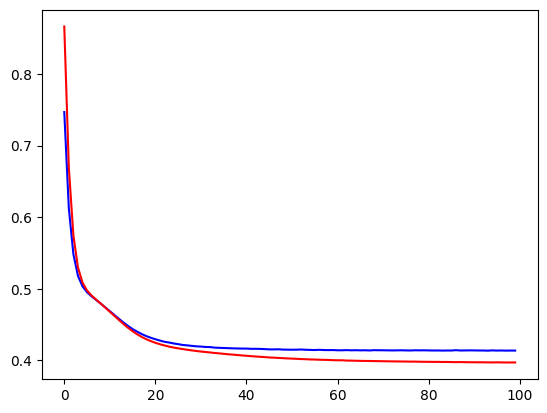

In [ ]:

plt.plot(history.history['val_loss'],color='blue')
plt.plot(history.history['loss'],color='red')


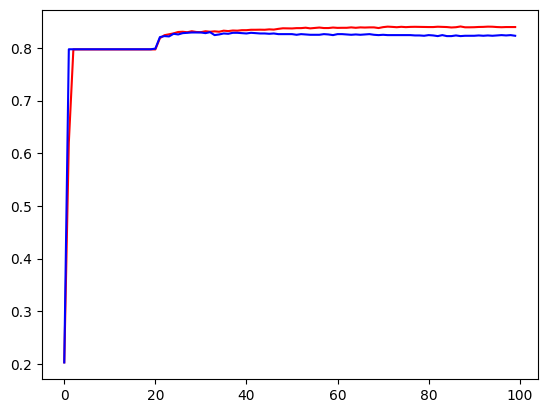

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'],color='blue')

In [ ]:
plt.plot(history.history['accuracy'],color='green')
